# $\alpha$ Centauri AB Orbit

Figure 1.6 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot the measured position of $\alpha$ Centauri B relative to $\alpha$ Centauri A as seen from Earth
during the times from AD1824-1893 from See [1893, MNRAS, 54, 102](https://ui.adsabs.harvard.edu/abs/1893MNRAS..54..102S).


In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [2]:
plotFile = 'Fig1_6.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data Files

There are two data files:
 * `AlphaCenAB_Obs_See1893.txt` - the observations of See (1893) expressed as angular separation and position angle of B from A, converted to projected x,y coordinates in arcseconds.
 * `AlphaCenAB_Eph.txt` - the orbital ephemeris transformed into the $\alpha$ Cen A reference frame.

In [3]:
# Observations from See (1893)

dataFile = 'AlphaCenAB_Obs_See1893.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
xCenB = np.array(data['xCenB'])
yCenB = np.array(data['yCenB'])

# Orbit Ephemeris

ephFile = 'AlphaCenAB_Eph.txt'
data = pd.read_csv(ephFile,sep=r'\s+',comment='#')
xOrb = np.array(data['xOrb'])
yOrb = np.array(data['yOrb'])

## Figure 1.6

Plot the observations as dots, the orbits as a line.  Plot is equal aspect ratio.

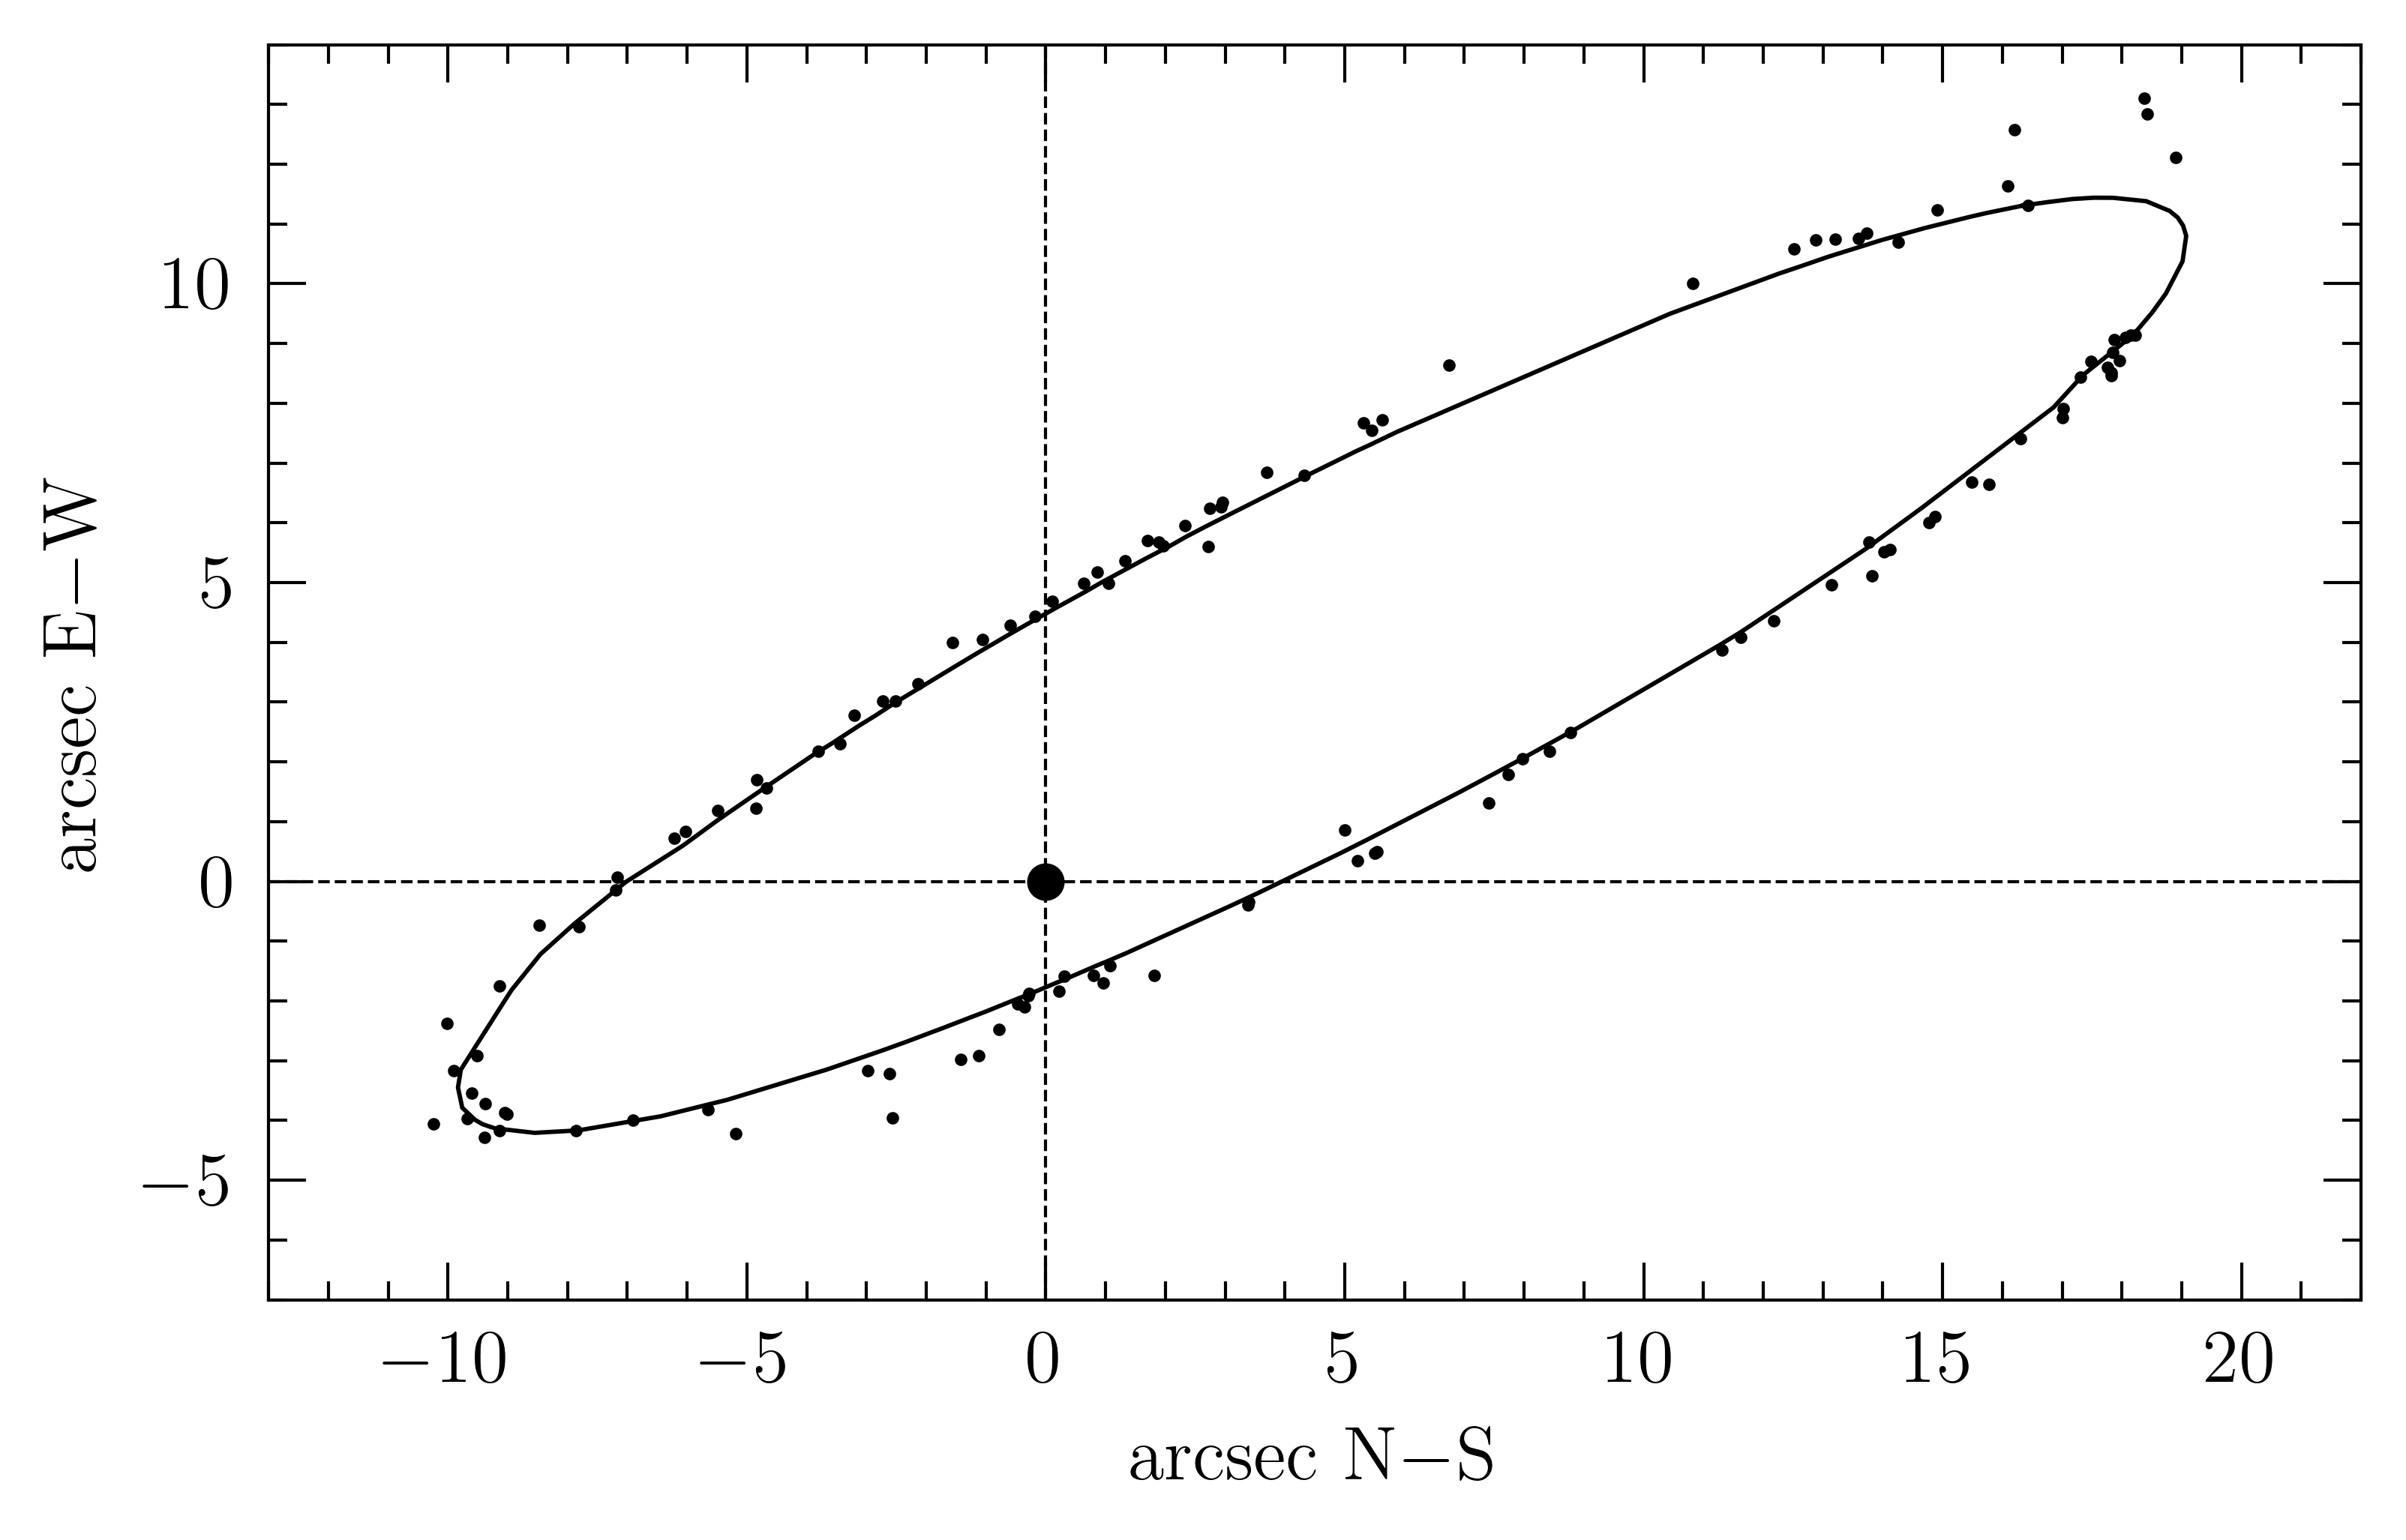

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# 1:1 aspect ratio

ax.set_aspect('equal')

# Axis Limits

xMin = -13
xMax = 22
yMin = -7
yMax = 14.

ax.set_xlim(xMin,xMax)
xMajorLocator = MultipleLocator(5)
xMinorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(xMajorLocator)
ax.xaxis.set_minor_locator(xMinorLocator)
ax.set_xlabel(r'arcsec N$-$S',fontsize=axisFontSize)

ax.set_ylim(yMin,yMax)
yMajorLocator = MultipleLocator(5)
yMinorLocator = MultipleLocator(1)
ax.yaxis.set_major_locator(yMajorLocator)
ax.yaxis.set_minor_locator(yMinorLocator)
ax.set_ylabel(r'arcsec E$-$W',fontsize=axisFontSize)

ax.plot(xCenB,yCenB,'o',color='black',mfc='black',markersize=1,zorder=10)
ax.plot(xOrb,yOrb,'-',color='black',lw=0.7)
ax.plot([0,0],[yMin,yMax],'--',color='black',lw=0.5)
ax.plot([xMin,xMax],[0,0],'--',color='black',lw=0.5)
ax.plot(0.0,0.0,'o',color='black',markersize=5,zorder=10)

# Make the plot

ax.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')